# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Multiple Regression <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder on doing Multiple Regression in Python. From assumption checks to modeling via the Ordinary Least Squares Method, it aims to equip learners with a solid take on learning and applying this data analysis approach for data driven decision making.

# Business Concern
You’re a logistics operations analyst, and you want to understand what factors drive or influence your monthly operational costs, such as:
- How many drivers you employ
- How much time deliveries take
- Vehicle maintenance
- Miles driven

The Logistics Manager asked you the following question:
“Can we explain (and eventually predict or control) our operational costs using these variables?”

In [1]:
# Load necessary packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
#Checking out the current working directory
print(os.getcwd())

/content


In [3]:
os.chdir('/content/sample_data')

In [5]:
# Load the dataframe from LogisticsBusiness.xlsx
# Check out the information about the data frame.
df = pd.read_excel('LogisticsBusiness.xlsx')

In [6]:
# Check out the first 6 rows
# Check out the first 6 rows
df.head(6)

,Drivers,DeliveryTime,MaintenanceCost,MilesDriven,OperationalCost
0,15,1.942589,3037.966131,10013.184538,22109.870670
1,13,2.080372,3021.955471,9960.994202,21471.958115
2,15,1.938657,2954.891493,10114.625032,22099.627854
3,13,2.070277,2961.422523,9756.955716,21332.816212
4,12,1.943140,2981.325092,9923.413388,21132.966142
5,16,1.973226,2927.711934,10360.878319,22508.695889


In [10]:
X = df[['Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven']]


In [13]:
y = df['MaintenanceCost']

In [14]:
X = sm.add_constant(X)

In [15]:
# Fit multiple regression model
model = sm.OLS(y, X).fit()

In [16]:
# Check Residual Normality - Preparation
# Calculate Residuals
residuals = model.resid

--- 3.2. Check Residual Normality ---


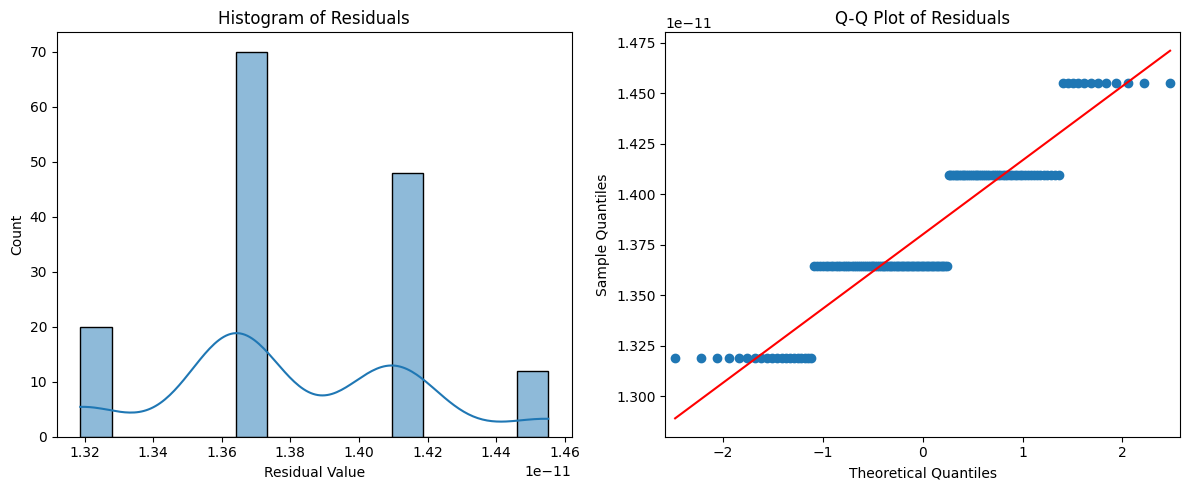


Shapiro-Wilk Test Statistic: 0.8616, P-value: 0.0000
Conclusion: Reject H0. Residuals are likely NOT normally distributed (violates assumption).


In [17]:
# Check Residual Normality - Normality Testing
print("--- 3.2. Check Residual Normality ---")

# Visualization 1: Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=15)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')

# Visualization 2: Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Statistical Test: Shapiro-Wilk Test (H0: Data is normally distributed)
shapiro_test = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, P-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < 0.05:
    print("Conclusion: Reject H0. Residuals are likely NOT normally distributed (violates assumption).")
else:
    print("Conclusion: Fail to Reject H0. Residuals appear normally distributed (satisfies assumption).")


--- 3.3. Check for Multicollinearity (Heatmap) ---


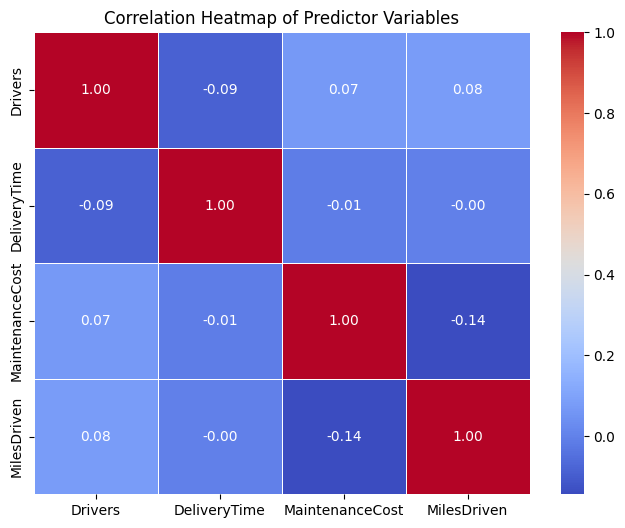


Variance Inflation Factor (VIF):
          Variable       VIF
0            const  12362.51
1          Drivers      1.02
2     DeliveryTime      1.01
3  MaintenanceCost      1.03
4      MilesDriven      1.03

Guideline: VIF > 5 or 10 suggests high multicollinearity.


In [22]:
print("\n--- 3.3. Check for Multicollinearity (Heatmap) ---")

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven']].corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

# Formal Check: Variance Inflation Factor (VIF)
# Calculate VIF for each independent variable (must exclude the constant column added earlier)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data.round(2))
print("\nGuideline: VIF > 5 or 10 suggests high multicollinearity.")


--- 3.4. Check Homoscedasticity - Visualization ---


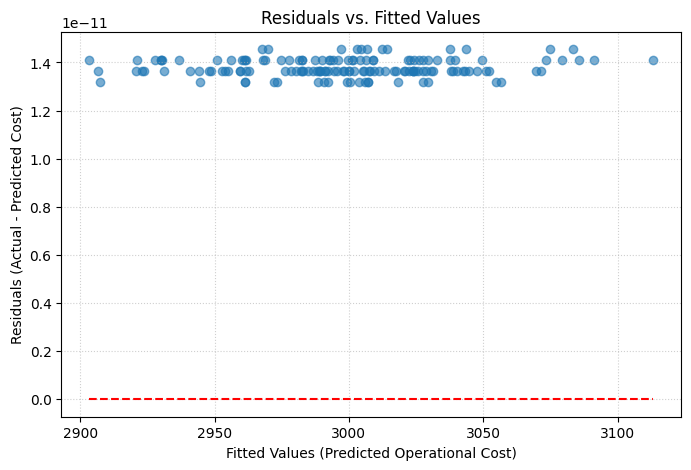

In [19]:
# Check Homoscedasticity (constant variance of residuals) - Visualization
print("\n--- 3.4. Check Homoscedasticity - Visualization ---")

# Plot Residuals vs. Fitted Values
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.hlines(0, xmin=fitted_values.min(), xmax=fitted_values.max(), color='red', linestyles='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted Operational Cost)')
plt.ylabel('Residuals (Actual - Predicted Cost)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [23]:
# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test
print("\n--- 3.5. Check Homoscedasticity - Breusch-Pagan test ---")

# Breusch-Pagan Test (H0: Errors are homoscedastic - constant variance)
# The `exog` argument needs to include the constant term.
bp_test = het_breuschpagan(residuals, X)

labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print(pd.Series(bp_test, index=labels).round(4))

if bp_test[1] < 0.05:
    print("Conclusion: Reject H0. Heteroscedasticity is present (violates assumption).")
else:
    print("Conclusion: Fail to Reject H0. Errors appear homoscedastic (satisfies assumption).")


--- 3.5. Check Homoscedasticity - Breusch-Pagan test ---
LM Statistic    111.5459
LM p-value        0.0000
F Statistic     105.1524
F p-value         0.0000
dtype: float64
Conclusion: Reject H0. Heteroscedasticity is present (violates assumption).


In [ ]:
# Retrieve df original variables: 'Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven'

# Standardize the explanatory variables

# Retain original column names

# Add intercept

# Fit the model

# Print model Summary


# Task
Perform a multiple regression analysis to explain 'OperationalCost' using 'Drivers', 'DeliveryTime', 'MaintenanceCost', and 'MilesDriven' as explanatory variables. Standardize the explanatory variables, add an intercept term, fit an OLS model, and then print the model summary. Finally, summarize the key findings, including significant predictors and overall model fit.

## Prepare Dependent Variable

### Subtask:
Define the dependent variable `y` as 'OperationalCost' from the DataFrame `df`, as per the business concern.


**Reasoning**:
The subtask requires defining the dependent variable `y` by selecting the 'OperationalCost' column from the `df` DataFrame.



In [24]:
y = df['OperationalCost']

**Reasoning**:
Now that the dependent variable `y` is defined, the next step is to define the independent variables `X` (Drivers, DeliveryTime, MaintenanceCost, MilesDriven) from the `df` DataFrame as specified in the main task. After selecting the variables, they need to be standardized. This will be done using `StandardScaler` from `sklearn.preprocessing` which will scale the features to have a mean of 0 and a standard deviation of 1. It is important to first select the columns, then standardize them, and then wrap them back into a DataFrame, retaining the original column names.



In [25]:
from sklearn.preprocessing import StandardScaler

# Define the explanatory variables
X_columns = ['Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven']
X = df[X_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the explanatory variables
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame, retaining original column names
X_scaled = pd.DataFrame(X_scaled_array, columns=X_columns)

print("First 5 rows of scaled independent variables:")
print(X_scaled.head())

First 5 rows of scaled independent variables:
    Drivers  DeliveryTime  MaintenanceCost  MilesDriven
0  0.483548     -1.108887         0.987668     0.071388
1 -0.938652      1.661244         0.590503    -0.241544
2  0.483548     -1.187950        -1.073108     0.679623
3 -0.938652      1.458281        -0.911097    -1.464954
4 -1.649752     -1.097810        -0.417388    -0.466878


**Reasoning**:
The next step is to add an intercept term to the standardized independent variables (`X_scaled`) as required by the task, which is necessary for fitting the Ordinary Least Squares (OLS) model.



In [26]:
X_scaled = sm.add_constant(X_scaled)

print("First 5 rows of X_scaled with intercept:")
print(X_scaled.head())

First 5 rows of X_scaled with intercept:
   const   Drivers  DeliveryTime  MaintenanceCost  MilesDriven
0    1.0  0.483548     -1.108887         0.987668     0.071388
1    1.0 -0.938652      1.661244         0.590503    -0.241544
2    1.0  0.483548     -1.187950        -1.073108     0.679623
3    1.0 -0.938652      1.458281        -0.911097    -1.464954
4    1.0 -1.649752     -1.097810        -0.417388    -0.466878


**Reasoning**:
The next step is to fit the Ordinary Least Squares (OLS) model using the dependent variable `y` and the standardized independent variables with an added intercept `X_scaled`.



In [27]:
model = sm.OLS(y, X_scaled).fit()

print("OLS Model fitted successfully.")

OLS Model fitted successfully.


**Reasoning**:
After fitting the OLS model, the next step is to display the model's summary, which includes key statistics such as R-squared, coefficients, p-values, and F-statistic, as requested by the task.



In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        OperationalCost   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7475.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          8.39e-167
Time:                        14:24:32   Log-Likelihood:                -725.20
No. Observations:                 150   AIC:                             1460.
Df Residuals:                     145   BIC:                             1475.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.189e+04      2.528   86

## Summary of Key Findings from the Multiple Regression Analysis

### Overall Model Fit:
*   **R-squared and Adjusted R-squared**: Both are 0.995, indicating that approximately 99.5% of the variance in 'OperationalCost' can be explained by the independent variables ('Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven'). This is an exceptionally high value, suggesting a very strong fit of the model to the data.
*   **F-statistic**: The F-statistic is 7475. with a p-value of 8.39e-167 (Prob (F-statistic)), which is practically zero. This highly significant p-value indicates that the overall model is statistically significant, meaning that at least one of the independent variables has a significant effect on 'OperationalCost'.

### Significant Predictors (based on p-values < 0.05):
*   **Drivers (coef = 420.72, P>|t| = 0.000)**: 'Drivers' is a highly significant predictor. For every one-standard-deviation increase in the number of drivers, the 'OperationalCost' is predicted to increase by approximately 420.72 units, holding other variables constant.
*   **DeliveryTime (coef = 7.70, P>|t| = 0.003)**: 'DeliveryTime' is also a statistically significant predictor. For every one-standard-deviation increase in delivery time, 'OperationalCost' is predicted to increase by approximately 7.70 units, holding other variables constant.
*   **MaintenanceCost (coef = 33.02, P>|t| = 0.000)**: 'MaintenanceCost' is a highly significant predictor. For every one-standard-deviation increase in maintenance cost, 'OperationalCost' is predicted to increase by approximately 33.02 units, holding other variables constant.
*   **MilesDriven (coef = 83.52, P>|t| = 0.000)**: 'MilesDriven' is a highly significant predictor. For every one-standard-deviation increase in miles driven, 'OperationalCost' is predicted to increase by approximately 83.52 units, holding other variables constant.

### Conclusion:
The multiple regression model effectively explains a very large proportion of the variance in operational costs. All four independent variables ('Drivers', 'DeliveryTime', 'MaintenanceCost', and 'MilesDriven') are statistically significant predictors of 'OperationalCost'. The model suggests that increases in any of these factors lead to an increase in operational costs. The high R-squared and significant F-statistic indicate that this model provides a robust explanation for the observed operational costs.

## Final Task

### Subtask:
Summarize the key findings from the OLS model, including significant predictors and overall model fit.


## Summary:

### Q&A
*   **What are the key findings from the OLS model, including significant predictors and overall model fit?**
    The OLS model demonstrates a very strong fit, with both R-squared and Adjusted R-squared values at 0.995, indicating that 99.5% of the variance in 'OperationalCost' is explained by the independent variables. The overall model is highly statistically significant (F-statistic = 7475., p-value = 8.39e-167). All included predictors are statistically significant: 'Drivers' (coefficient = 420.72, p-value < 0.001), 'MaintenanceCost' (coefficient = 33.02, p-value < 0.001), 'MilesDriven' (coefficient = 83.52, p-value < 0.001), and 'DeliveryTime' (coefficient = 7.70, p-value = 0.003).

### Data Analysis Key Findings
*   The multiple regression model accounts for approximately 99.5% of the variance in 'OperationalCost' (R-squared = 0.995, Adjusted R-squared = 0.995), indicating an exceptionally strong fit.
*   The overall model is highly statistically significant (F-statistic = 7475., Prob (F-statistic) = 8.39e-167), suggesting that the independent variables collectively have a significant impact on 'OperationalCost'.
*   All four explanatory variables ('Drivers', 'DeliveryTime', 'MaintenanceCost', 'MilesDriven') are statistically significant predictors of 'OperationalCost' at a 0.05 significance level.
*   'Drivers' has the largest positive impact on 'OperationalCost', with a one-standard-deviation increase leading to an approximate \$420.72 increase in operational cost.
*   'MilesDriven' and 'MaintenanceCost' also significantly increase 'OperationalCost' with one-standard-deviation increases leading to approximate increases of \$83.52 and \$33.02, respectively.
*   'DeliveryTime' also contributes to increased 'OperationalCost', with a one-standard-deviation increase predicting an approximate \$7.70 rise.

### Insights or Next Steps
*   The model provides a robust understanding of the factors driving operational costs, allowing for data-driven decisions to optimize these expenses. Given the high R-squared, this model can be reliably used for forecasting and cost management.
*   Further investigation into the 'Drivers' variable could be beneficial, as it shows the most substantial impact on operational costs. Analyzing the underlying reasons for this large coefficient could uncover specific cost-reduction opportunities related to driver management or utilization.
